<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02162019_6%5D_Keras_CIFAR_10_CNNv1_2Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train :",len(x_img_train))
print("test :",len(x_img_test))

train : 50000
test : 10000


In [4]:
print("train shape :",x_img_train.shape)
print("test shape :",x_img_test.shape)

train shape : (50000, 32, 32, 3)
test shape : (10000, 32, 32, 3)


In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [0]:
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx],cmap='binary')
    title=str(i)+','+label_dict[labels[i][0]]
    if len(prediction)>0:
      title+= '=>' +label_dict[prediction[i]]
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()    

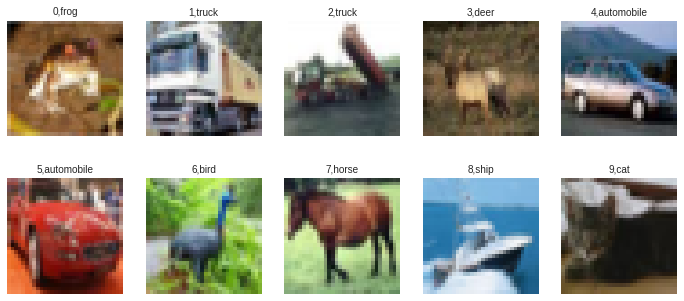

In [8]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

## Images Preprocess

In [9]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [0]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.2

In [11]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [12]:
x_img_test_normalize.shape

(10000, 32, 32, 3)

## Label Preprocess

In [13]:
y_label_train.shape

(50000, 1)

In [14]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [16]:
y_label_train_OneHot.shape

(50000, 10)

In [17]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Construction

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024,activation=('relu')))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10,activation='softmax'))

In [31]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# Training

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 1.5033 - acc: 0.4591 - val_loss: 1.2741 - val_acc: 0.5826
Epoch 2/10
 - 8s - loss: 1.1327 - acc: 0.5972 - val_loss: 1.1085 - val_acc: 0.6395
Epoch 3/10
 - 8s - loss: 0.9777 - acc: 0.6574 - val_loss: 1.0092 - val_acc: 0.6657
Epoch 4/10
 - 8s - loss: 0.8704 - acc: 0.6947 - val_loss: 0.9490 - val_acc: 0.6928
Epoch 5/10
 - 8s - loss: 0.7829 - acc: 0.7248 - val_loss: 0.8787 - val_acc: 0.7080
Epoch 6/10
 - 8s - loss: 0.6995 - acc: 0.7542 - val_loss: 0.8484 - val_acc: 0.7195
Epoch 7/10
 - 8s - loss: 0.6148 - acc: 0.7837 - val_loss: 0.8168 - val_acc: 0.7242
Epoch 8/10
 - 8s - loss: 0.5483 - acc: 0.8090 - val_loss: 0.7810 - val_acc: 0.7414
Epoch 9/10
 - 8s - loss: 0.4786 - acc: 0.8330 - val_loss: 0.7806 - val_acc: 0.7294
Epoch 10/10
 - 8s - loss: 0.4253 - acc: 0.8532 - val_loss: 0.7622 - val_acc: 0.7408


In [0]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

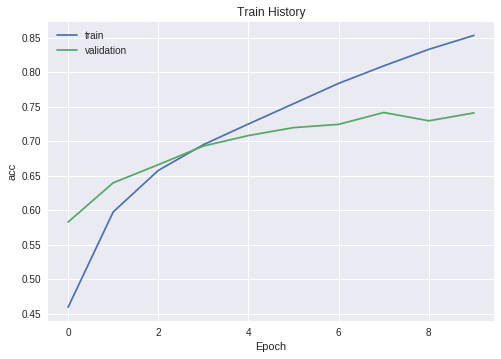

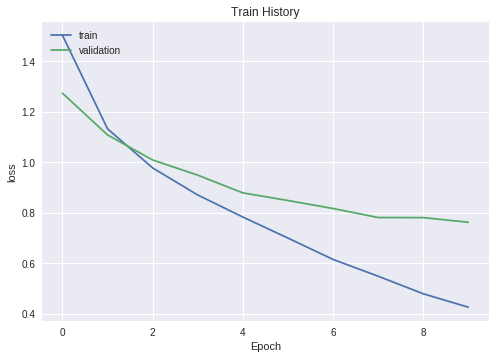

In [35]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [37]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 117us/step
accuracy= 0.7334


# Prediction

In [38]:
prediction=model.predict_classes(x_img_test_normalize)
print(prediction)

[3 8 8 ... 5 4 7]


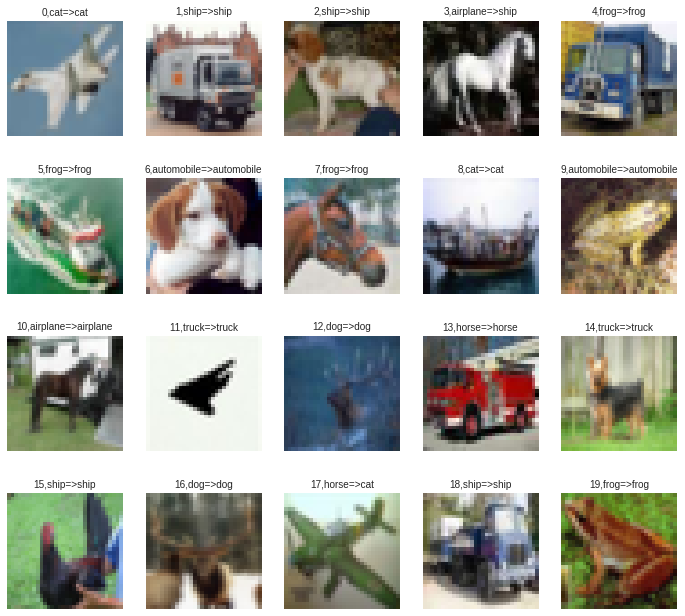

In [39]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,10,20)

In [0]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [0]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
  print('label :',label_dict[y[i][0]]),'predict',label_dict[prediction[i]]
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+'Porbability:%1.9f' %(Predicted_Probability[i][j]))
  

label : cat


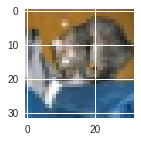

airplanePorbability:0.003765275
automobilePorbability:0.001732010
birdPorbability:0.033429354
catPorbability:0.753196061
deerPorbability:0.008883188
dogPorbability:0.152857721
frogPorbability:0.020289287
horsePorbability:0.006695851
shipPorbability:0.018096521
truckPorbability:0.001054763


In [42]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label : airplane


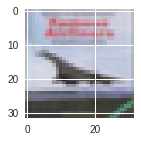

airplanePorbability:0.429445893
automobilePorbability:0.001307430
birdPorbability:0.051648267
catPorbability:0.001006189
deerPorbability:0.014299496
dogPorbability:0.000031173
frogPorbability:0.000081907
horsePorbability:0.000020108
shipPorbability:0.501362681
truckPorbability:0.000796893


In [43]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [44]:
prediction.shape

(10000,)

In [45]:
y_label_test.shape

(10000, 1)

In [47]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [48]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [50]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,787,8,70,12,14,7,18,4,56,24
1,25,810,19,15,4,3,21,1,33,69
2,49,1,677,44,73,48,83,11,9,5
3,13,6,85,507,57,182,121,16,7,6
4,17,2,96,50,689,26,89,18,12,1
5,11,0,72,146,39,635,63,23,4,7
6,6,2,43,27,16,14,889,0,3,0
7,10,0,63,34,89,72,20,703,5,4
8,42,24,23,17,6,6,13,1,855,13
